In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
# Import 1D array of grayscale values of an image.
data = np.fromfile("../Images/data_rectangle.raw", dtype=np.float32)

(60000,)


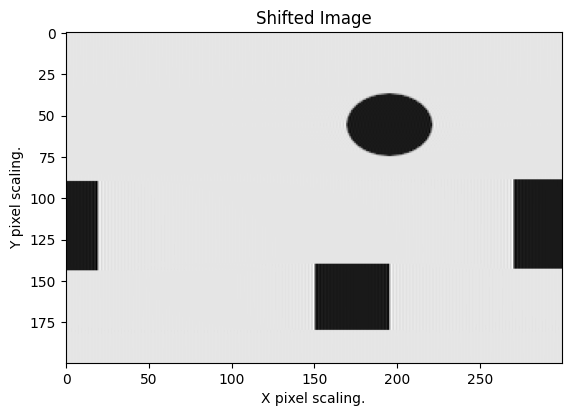

In [53]:
# data = np.reshape(data, (200,300))

NX = 200
NY = 300

print(data.shape)

# N = data.shape[0] * data.shape[1]
N = len(data)

G = np.zeros(N, dtype=complex)
# G = np.fft.fft2(data)
G = np.fft.fft(data)
# print(G)

delta = 45

a = np.tan(np.deg2rad(delta)/2)

N_prime = N if N % 2 == 0 else N+1
for k in range(0,int(N_prime/2)):
    G[k] = np.exp(-2j * np.pi * a * k / N) * G[k]
for k in range(int(N_prime/2), N):
    G[k] = np.exp(-2j * np.pi * a * (k - N) / N) * G[k]
    
for k in range(0,N):
    if N % 2 == 0 and k == N/2:
        ambiguous = np.exp(-2j * (N//2) / N * np.pi * a)
        G[k] = 0.5 * (ambiguous + 1/ambiguous)
        

# window = lanczos(N,sym=False)

# G *= window
        
    
final_output = np.zeros(N, dtype=complex)
# final_output = np.fft.ifft2(G)
final_output = np.fft.ifft(G)

# final_output = np.reshape(final_output.real,(200,300))

plt.title("Shifted Image")
plt.xlabel("X pixel scaling.")
plt.ylabel("Y pixel scaling.")
final_output = np.reshape(final_output, (200,300))

# Visualize the data as an image
plt.imshow(final_output.real, cmap='gray')
# plt.imshow(np.reshape(data, (200,300)), cmap='gray')
plt.show()